In [306]:

%pip install tensorflow
%pip install tensorflow-gpu
%pip install opencv-matplotlib
%pip install matplotlib

123946.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


123953.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  ERROR: Command errored out with exit status 1:
   command: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1_/v_fdx3ys6l1d8vl2jlyg4k840000gn/T/pip-install-jhg8aveg/tensorflow-gpu_fcd7386a3c4f40dcbb9e005c29734961/setup.py'"'"'; __file__='"'"'/private/var/folders/1_/v_fdx3ys6l1d8vl2jlyg4k840000gn/T/pip-install-jhg8aveg/tensorflow-gpu_fcd7386a3c4f40dcbb9e005c29734961/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/1_/v_fdx3ys6l1d8vl2jlyg4k840000gn/T/pip-wheel-tukifuhy
       cwd: /private/var/folders/1_/

123960.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement opencv-matplotlib (from versions: none)
ERROR: No matching distribution found for opencv-matplotlib
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


123966.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [307]:
import tensorflow as tf
import os

# to find the number of gpus I have available in my system

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus


[]

In [308]:
!pip list

123972.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse   

In [309]:
# good to avoid out of memory errors by setting the memory growth to true
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [310]:
# Basic set up and installation of dependies is done for the immageclassifier - classify happy people from sad people
# classes happy and sad have been downloaded
# clean out the dodgy images - wrong extensions, wrong labels, corrufted images

%pip install opencv-python

import cv2 as cv # computer vision library
import imghdr # image header library - to check the image header

123978.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [311]:
# move all the images into a folder called data
# preprocess the images - remove the dodgy images

# create a list of image extensions that are valid 
data_dir = 'data'
valid_ext = ['jpg', 'jpeg', 'png', 'bmp']

os.listdir(os.path.join(data_dir,'happy'))  # list all the images within the happy folder
# os.listdir(os.path.join(data_dir,'sad'))  # list all the images within the sad folder


['OIP.5Hc_g2CFQ1psi2BYJgmmQwHaEK.jpg',
 'OIP.9LHNxjkkUdymsZ-17fIS0wHaHJ.jpg',
 'th11.jpg',
 'OIP.FustAUJDUPZJThLsHWxu4gHaIm.jpg',
 '05-12-21-happy-people.jpg',
 'wp3719969.jpg',
 'OIP.JghtsMew6lnninbkxBwkRAAAAA.jpg',
 'OIP.Qvl5obVH7DwngVCHoDxr2QHaHT.jpg',
 'OIP._oozFxnc4wBYmNqwft_BVQHaEo.jpg',
 'Happy-Old-People.jpg',
 '1902544.jpg',
 'OIP.MWAeVCZyMKxIHL0Z1XPIlgHaFn.jpg',
 'Happy-people-768x785.jpg',
 'OIP.PAbdvKtKJOHXjOe5s6AVDwHaEo.jpg',
 'th13.jpg',
 'th17.jpg',
 'bigstock-Happy-Group-Of-People-3928383-2-1-scaled.jpg',
 'th8.jpg',
 'habits-of-happy-people-jpg.jpg',
 '.DS_Store',
 'OIP.N8t9_V8LdE7BbIz-C1yyiAHaE8.jpg',
 'th16.jpg',
 'th14.jpg',
 'OIP.Ghao8YEZRt-J60vOL1lW-QHaD4.jpg',
 'OIP.8-EgD1Z_-VgharO8mV_ChQHaEq.jpg',
 'happy-people-6918400.jpg',
 'bigstock_Happy_Business_People_With_Han_4049346.jpg',
 'th29.jpg',
 'Happy_People_Happy_Man.jpg',
 'Happiness.jpg',
 'OIP.NnaF6NCAzHRk-jCwX4K_qAHaEo.jpg',
 '5Hoq5twItmrrW76KaBPuyhV9Kt0.jpg',
 'Fun-Group-of-Young-People-Jump-19461599.jpg',

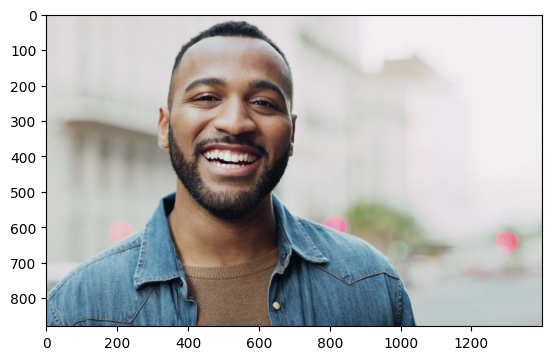

In [312]:
import matplotlib.pyplot as plt

image_example = cv.imread(os.path.join(data_dir, 'happy', '05-12-21-happy-people.jpg'))
image_example.shape  # gives the dimensions of the image 
#image_display = plt.imshow(image_example) # displays a BGR image
image_display = plt.imshow(cv.cvtColor(image_example, cv.COLOR_BGR2RGB))  # display the image
image_display


In [313]:
# checking if each of the images present in the happy and sad folders are valid images
import imghdr

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                image = cv.read(image_path)
                ext = imagehdr.what(image_path)
                if ext not in valid_ext:
                    print("image not valid: {}".format(image_path))
                    os.remove(image_path)
            except:
                print("issue with the image: {}".format(image_path))
                # os.remove(image_path)



# exception has been thrown for a couple images in this case
            

issue with the image: data/happy/OIP.5Hc_g2CFQ1psi2BYJgmmQwHaEK.jpg
issue with the image: data/happy/OIP.9LHNxjkkUdymsZ-17fIS0wHaHJ.jpg
issue with the image: data/happy/th11.jpg
issue with the image: data/happy/OIP.FustAUJDUPZJThLsHWxu4gHaIm.jpg
issue with the image: data/happy/05-12-21-happy-people.jpg
issue with the image: data/happy/wp3719969.jpg
issue with the image: data/happy/OIP.JghtsMew6lnninbkxBwkRAAAAA.jpg
issue with the image: data/happy/OIP.Qvl5obVH7DwngVCHoDxr2QHaHT.jpg
issue with the image: data/happy/OIP._oozFxnc4wBYmNqwft_BVQHaEo.jpg
issue with the image: data/happy/Happy-Old-People.jpg
issue with the image: data/happy/1902544.jpg
issue with the image: data/happy/OIP.MWAeVCZyMKxIHL0Z1XPIlgHaFn.jpg
issue with the image: data/happy/Happy-people-768x785.jpg
issue with the image: data/happy/OIP.PAbdvKtKJOHXjOe5s6AVDwHaEo.jpg
issue with the image: data/happy/th13.jpg
issue with the image: data/happy/th17.jpg
issue with the image: data/happy/bigstock-Happy-Group-Of-People-392

In [314]:
# use keras to build the model - create a dataset with prefined number of batches and image size. Creates validation sets automatically

# preprocessing the images - resizing the images to a standard size
data = tf.keras.utils.image_dataset_from_directory(data_dir) # creates a data pipeline

data_iterator = data.as_numpy_iterator() # helps access the data in the pipeline
# batch = data_iterator.next() # get the next batch of the data

Found 194 files belonging to 2 classes.


In [315]:
# get another batch everytime we run the code
batch = data_iterator.next() # get the next batch of the data
len(batch)
batch[0].shape  # the deep learning model processes the images in batches of 32, each image being 256x256 pixels and having 3 input channels (RGB)
batch[1]


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

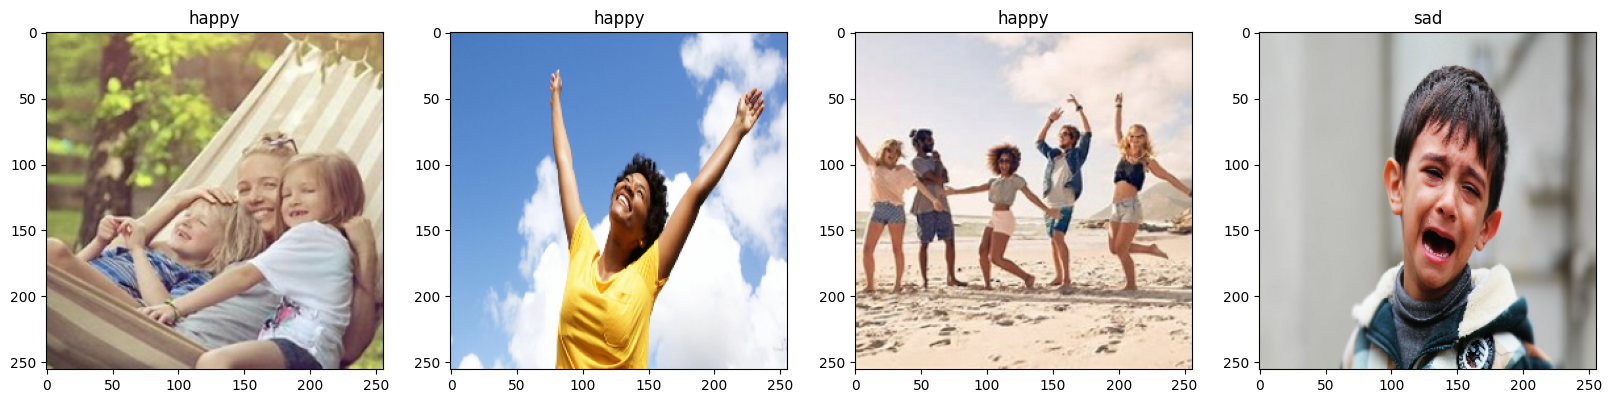

In [316]:
# since the images are classified as binary values - 1 and 0, we can try to find out which value corresponds to happy and which correcponds to sad
fig, ax = plt.subplots(1, 4, figsize = (20,20))
for i in range(4):
    ax[i].imshow(batch[0][i].astype('uint8'))
    ax[i].set_title(batch[1][i])
    if batch[1][i] == 0:
        ax[i].set_title('happy')
    else:
        ax[i].set_title('sad')

In [317]:
# Thus we found out the "happy" images correspond to 0 while the sad images correspond to 1 "Anti-Intuitively :/"

# Next Tasks - scale our images to a standard size (0 to 1) instead of the present dimensions (0 to 255) for faster generalization. This can help in faster training of the model
# Additionally, we can split the keras dataset into training, testing and validation sets for better generalization


# Scale the images into data pipeline
data = data.map(lambda x, y:(x/255, y)) # scale all the images to a standard size for faster generalization of the deep learning model

In [318]:
# recheck if the images in the data pipeline have been scales
scaled_data_iterator = data.as_numpy_iterator()
batch = scaled_data_iterator.next()

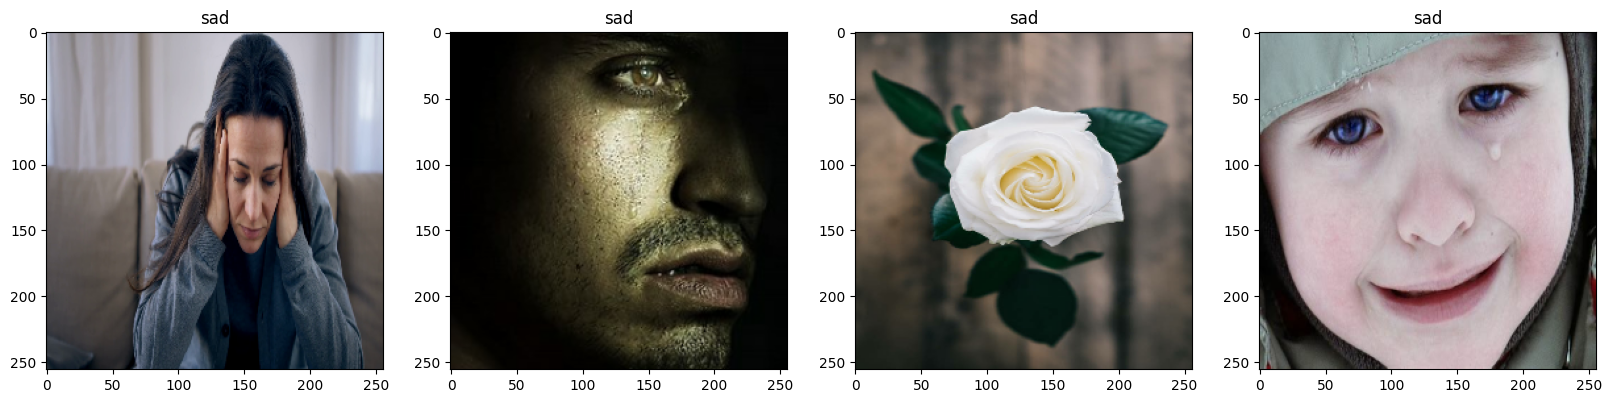

In [319]:
fig, ax = plt.subplots(1,4, figsize = (20,20))
for i in range(4):
    ax[i].imshow(batch[0][i].astype('float32'))
    if batch[1][i] == 0:
        ax[i].set_title('happy')
    else:
        ax[i].set_title('sad')


In [320]:
# data is scaled so that images are between 0 and 1
# now, we can split the data into training, testing and validation sets

import math 

# I want 70% of my images to be in the training set, 20% in the validation set and 10% in the testin set
total_size = len(data)
print(total_size)
train_size = int(0.7 * total_size)
print(train_size)
test_size = int(0.1 * total_size) + 1
print(test_size)
validation_size = int(0.2 * total_size) + 1
print(validation_size)

7
4
1
2


In [321]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(validation_size)
test_data = data.skip(train_size + validation_size).take(test_size)

In [322]:
#  Pre-processing steps are done. Now we can build the model on the train, test, and validation data

%pip install --upgrade tensorflow

123988.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [323]:
# import statements for building a deep neural network - building an architecture made of several layers and hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [324]:
# To calculate the output size after convolving and pooling the input image 
# the formula comes out to be (input_size - filter_size + 2*padding)/stride + 1

# building the model - sequential model - apply filters in the first layer, apply pooling to reduce the size of the image (remove redundant features), after building subsequent convulational layers and pooling on the same, flatten it out to reduce the number of input channels, and finally apply a dense layer to get the output
model = Sequential() # initialize a sequential model to which I will add convolutional layers

model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = (256,256,3))) # apply 32 filters of size 3x3 to the input image of size 256x256 with 3 input channels    
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation = 'relu')) # apply 16 filters of size 3x3 to output produced by the previous layer
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation = 'relu')) # apply 32 filters of size 3x3 to output produced by the previous layer
model.add(MaxPooling2D())

model.add(Flatten()) # flatten the output produced by the previous layer to reduce the number of input channels

model.add(Dense(256, activation = 'relu'))  # apply a dense layer to the output produced by the previous layer
model.add(Dense(1, activation = 'sigmoid')) # apply a dense layer to the output produced by the previous layer

/Users/induranasingh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [325]:
# compiling the final model - specifying the optimizer, the loss function, and and the accuracy metric to be used
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [326]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [327]:
# model.review() gives us a summary of the models architecture including the type of layer, the output shape, and the number of parameters present in each layer

# create a directory to save the checkpoints of the model (the accuracy of the model at each epoch - (my chosen metric))
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
hist = model.fit(train_data, validation_data = val_data, epochs = 10, callbacks = [tensorboard_callback])

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step - accuracy: 0.5375 - loss: 1.0225 - val_accuracy: 0.5469 - val_loss: 0.8140
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 495ms/step - accuracy: 0.5115 - loss: 0.8298 - val_accuracy: 0.6406 - val_loss: 0.6119
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.6406 - loss: 0.6337 - val_accuracy: 0.5469 - val_loss: 0.6257
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - accuracy: 0.7167 - loss: 0.5827 - val_accuracy: 0.8438 - val_loss: 0.5350
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step - accuracy: 0.8448 - loss: 0.5200 - val_accuracy: 0.7656 - val_loss: 0.5131
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.8250 - loss: 0.4900 - val_accuracy: 0.6719 - val_loss: 0.5791
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.7844 - loss: 0.4590 - val_accuracy: 0.7500 - val_loss: 0.5298
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.7927 - loss: 0.4202 - val_accuracy: 0.8750 - val_loss:

In [328]:
# Loss goes down and accuracy goes up with each epoch
hist.history

{'accuracy': [0.5390625,
  0.5390625,
  0.609375,
  0.75,
  0.8359375,
  0.828125,
  0.8125,
  0.8203125,
  0.8359375,
  0.8046875],
 'loss': [1.2210280895233154,
  0.7881189584732056,
  0.6618916392326355,
  0.5791031122207642,
  0.5212156772613525,
  0.4875831604003906,
  0.4304829239845276,
  0.3957127332687378,
  0.4021056294441223,
  0.3836696147918701],
 'val_accuracy': [0.546875,
  0.640625,
  0.546875,
  0.84375,
  0.765625,
  0.671875,
  0.75,
  0.875,
  0.859375,
  0.859375],
 'val_loss': [0.8140132427215576,
  0.6118888854980469,
  0.6256991624832153,
  0.5349979400634766,
  0.5130614042282104,
  0.5790852904319763,
  0.5297962427139282,
  0.4068131446838379,
  0.36220496892929077,
  0.37016820907592773]}

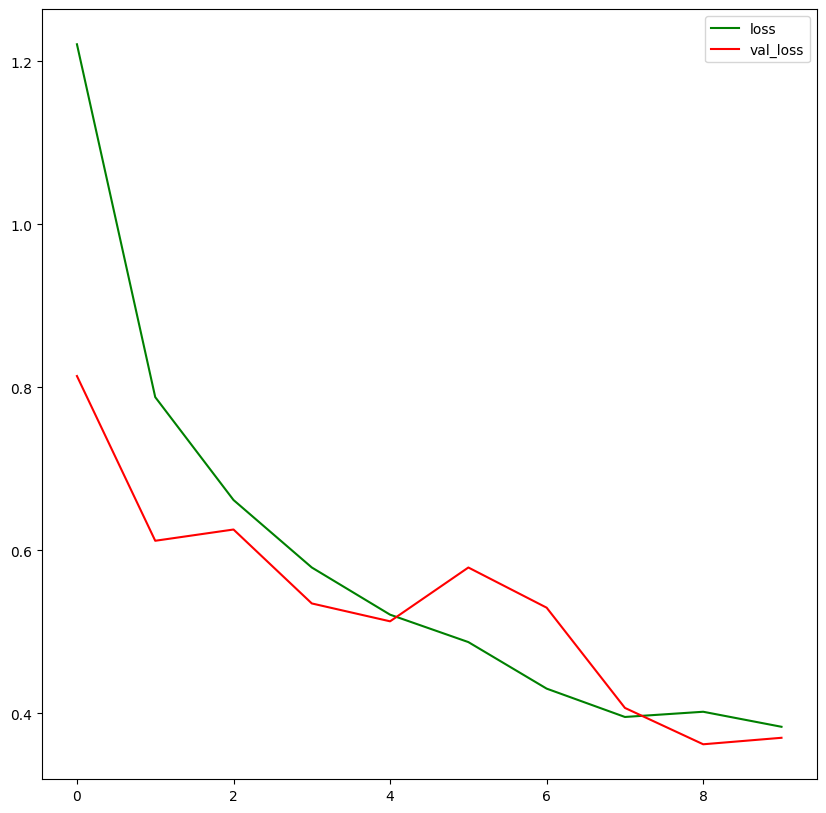

In [329]:
fig = plt.figure(figsize = (10, 10))
plt.plot(hist.history['loss'], label = 'loss', color = 'green')
plt.plot(hist.history['val_loss'], label = 'val_loss', color = 'red')
plt.legend(loc = 'upper right')
plt.show()


# if the training loss is substantially lower than the validation loss, the model might be overfitted on the training data
# if the loss trend is in an upward direction, we might need more layers in our neural network to train on the data more effectively

In [330]:
# we can use use several metrics using the metrics present in the tf.keras.metrics module like the 'Precision', 'Recall', and 'BinaryAccuracy' classes
# we can also use the tensorboard to visualize the training and validation loss and accuracy of the model

# instatiate each of these classes
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [331]:
print(test_data)
print(data)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [332]:
for batch in test_data:
    predictions = model.predict(batch[0])
    precision.update_state(batch[1], predictions)
    recall.update_state(batch[1], predictions)
    accuracy.update_state(batch[1], predictions)

print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("Accuracy: ", accuracy.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Precision:  1.0
Recall:  1.0
Accuracy:  1.0


2024-07-12 10:10:07.045658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


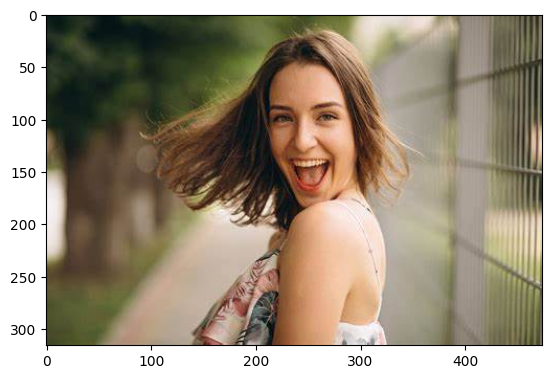

In [340]:
# Thus the metrics are calculated on the predicted values of the model based on the actual values of y in the test data - strong model prediction

import cv2 as cv # computer vision library

happy_image = cv.imread('happy_test.jpg')
happy_image_rgb = cv.cvtColor(happy_image, cv.COLOR_BGR2RGB)
plt.imshow(happy_image_rgb)
plt.show()


# I will be testing my Image Classifier model on this image


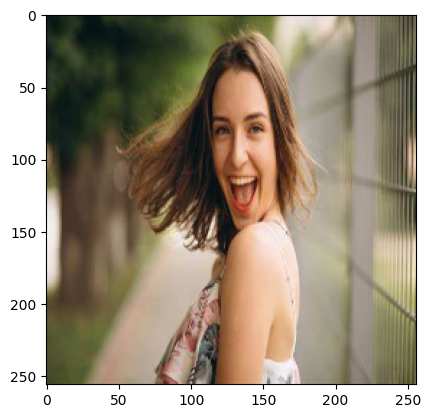

In [341]:
# preprocess the image - resize the image to the same size as the images in the training data and scale the image to a standard size
resized_image = tf.image.resize(happy_image_rgb, (256, 256))
plt.imshow(resized_image.numpy().astype('uint8'))

In [344]:
# Lets take a look at the prediction given out by the model on this image
import numpy as np
y_hat = model.predict(np.expand_dims(resized_image/255, axis = 0)) 
if y_hat < 0.5:
    print("Predicted Class is Happy")
else:    
    print("Predicted Class is Sad")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class is Happy


In [347]:
# saving our neural network model
from tensorflow.keras.models import load_model
model.save(os.path.join('models','image_classifier.h5'))


In [348]:
# to load the model
new_model = load_model(os.path.join('models','image_classifier.h5'))

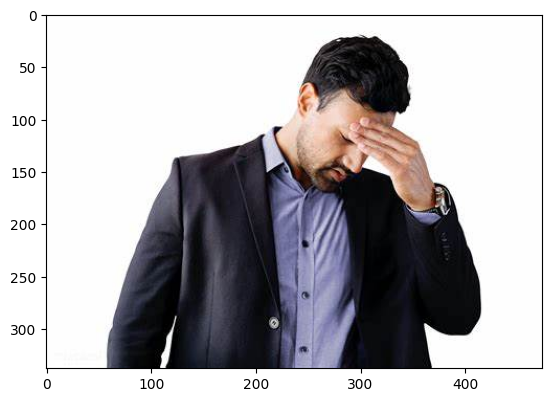

In [349]:
# testing the new model on a new image
sad_image = cv.imread('sad_test.jpg')
sad_image_rgb = cv.cvtColor(sad_image, cv.COLOR_BGR2RGB)
plt.imshow(sad_image_rgb)

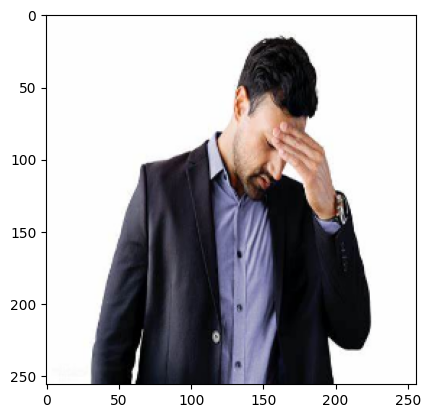

In [350]:
sad_resized_image = tf.image.resize(sad_image_rgb, (256, 256))
plt.imshow(sad_resized_image.numpy().astype('uint8'))

In [353]:
y_hat = model.predict(np.expand_dims(sad_resized_image/255, axis = 0))
if y_hat < 0.5:
    print("Predicted Class is Happy")
else:
    print("Predicted Class is Sad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class is Sad
